In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)


In [ ]:
!pip install tensorflow

In [207]:
df = pd.read_csv('/content/drive/MyDrive/UU/ETH-USD (BaoCao).csv')


df = df.groupby('Date').sum()

In [ ]:
!pip install keras

In [208]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...
2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324
2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736
2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797


In [209]:
import numpy as np
data = df[['Close']]
# Convert the dataframe to a numpy array
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .9 ))
dataset

array([[ 136.443619],
       [ 134.206955],
       [ 132.24942 ],
       ...,
       [3746.849609],
       [3760.026611],
       [3813.198975]])

In [210]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00549566],
       [0.00501992],
       [0.00460356],
       ...,
       [0.77342508],
       [0.77622782],
       [0.78753752]])

In [211]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# we use 60 days ahead for forecasting range
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.00549566, 0.00501992, 0.00460356, 0.00365167, 0.00578892,
       0.0059946 , 0.00583404, 0.00521563, 0.00581933, 0.00556267,
       0.0049406 , 0.00507011, 0.00481916, 0.00491456, 0.00576114,
       0.00676219, 0.00625222, 0.00611908, 0.00636253, 0.00639809,
       0.00553659, 0.00565259, 0.00587772, 0.00561122, 0.0051952 ,
       0.00528652, 0.00646228, 0.00612798, 0.0067833 , 0.00669721,
       0.00657415, 0.00664141, 0.01134874, 0.01081636, 0.01009185,
       0.01167908, 0.01177104, 0.01359694, 0.01481511, 0.01393363,
       0.01419374, 0.01167529, 0.01151349, 0.01146606, 0.01217332,
       0.0108409 , 0.01212758, 0.0119845 , 0.01344431, 0.01342185,
       0.01343096, 0.01264296, 0.01303181, 0.01294101, 0.01174528,
       0.0093276 , 0.00972911, 0.01017319, 0.00993074, 0.00948555])]
[0.010966789443277211]

[array([0.00549566, 0.00501992, 0.00460356, 0.00365167, 0.00578892,
       0.0059946 , 0.00583404, 0.00521563, 0.00581933, 0.00556267,
       0.0049406 , 0.00507011, 0.0

<Axes: xlabel='Date'>

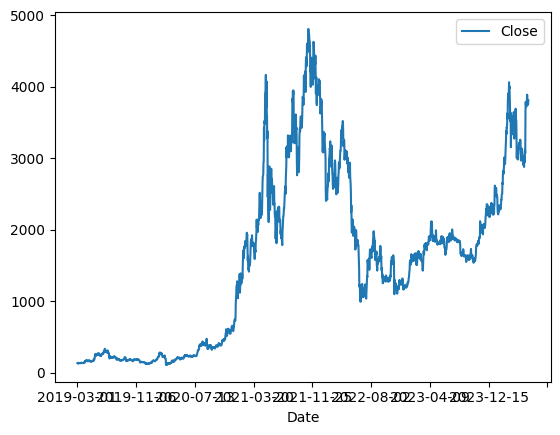

In [212]:
data.plot()

In [213]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1668/1668 [==============================] - 103s 60ms/step - loss: 0.0024


In [214]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Dự đoán dữ liệu kiểm tra
predictions = model.predict(x_test)

# Chuẩn bị dữ liệu đầu vào cho dự đoán 30, 60, và 90 ngày
x_input = test_data[-60:].reshape(1, -1)
temp_input = list(x_input[0])

# Dự đoán 30, 60, và 90 ngày tiếp theo
lst_output = []
n_steps = 60
i = 0
while i < 90:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

6/6 [==============================] - 2s 40ms/step


In [215]:
# Chuẩn bị dữ liệu cho biểu đồ
train_data = scaled_data[:training_data_len]
valid_data = scaled_data[training_data_len:]
train_data_index = pd.RangeIndex(start=0, stop=len(train_data), step=1)
test_data_index = pd.RangeIndex(start=len(train_data), stop=len(train_data) + len(valid_data), step=1)


In [216]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(scaled_data)  # Giả sử scaled_data đã được chuẩn bị trước
train_data_inv = scaler.inverse_transform(train_data)
valid_data_inv = scaler.inverse_transform(valid_data)
predictions_inv = scaler.inverse_transform(predictions)
lst_output_inv = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))


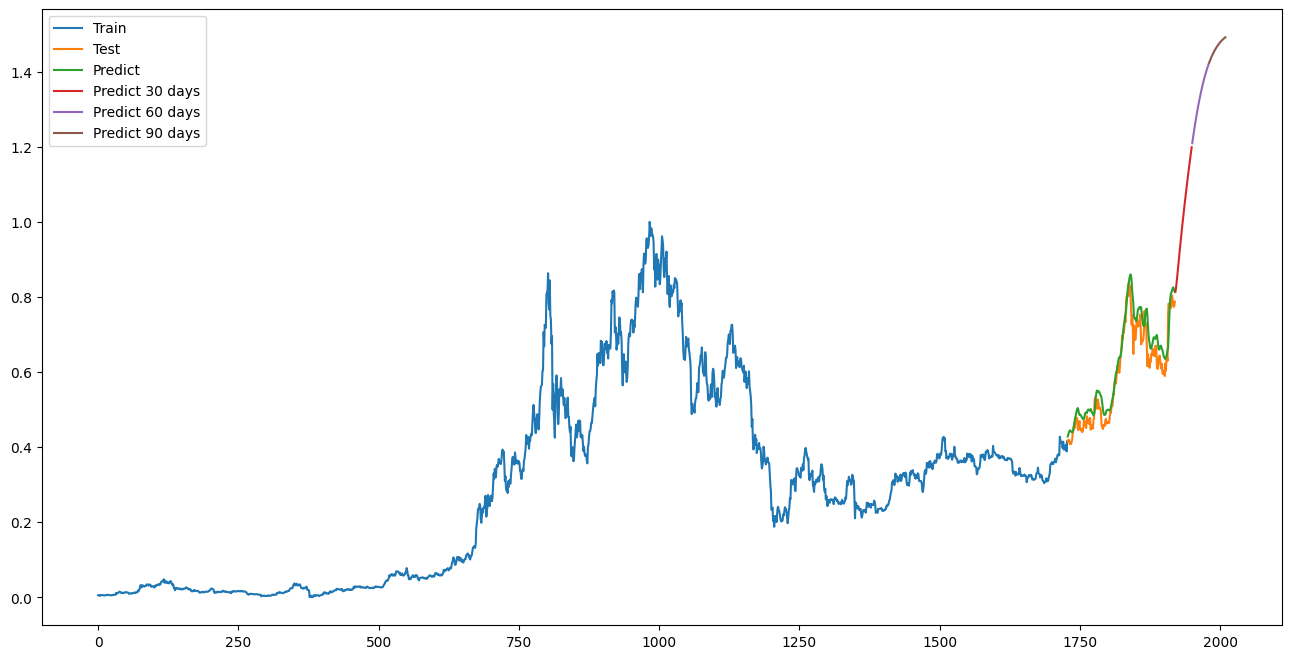

In [217]:

# Vẽ biểu đồ
plt.figure(figsize=(16,8))
plt.plot(train_data_index, train_data_inv, label='Train')
plt.plot(test_data_index, valid_data_inv, label='Test')
plt.plot(test_data_index, predictions_inv, label='Predict')

# Chỉ số dữ liệu dự đoán 30 ngày đầu tiên
predict_data_index_30 = pd.RangeIndex(start=len(scaled_data), stop=len(scaled_data) + 30, step=1)
plt.plot(predict_data_index_30, lst_output_inv[:30], label='Predict 30 days')

# Chỉ số dữ liệu dự đoán 60 ngày tiếp theo
predict_data_index_60 = pd.RangeIndex(start=len(scaled_data) + 30, stop=len(scaled_data) + 60, step=1)
plt.plot(predict_data_index_60, lst_output_inv[30:60], label='Predict 60 days')

# Chỉ số dữ liệu dự đoán 90 ngày cuối cùng
predict_data_index_90 = pd.RangeIndex(start=len(scaled_data) + 60, stop=len(scaled_data) + 90, step=1)
plt.plot(predict_data_index_90, lst_output_inv[60:90], label='Predict 90 days')

# Hiển thị đồ thị
plt.legend()
plt.show()

In [218]:
# Dự đoán giá trị
predictions = model.predict(x_test)

# Chuẩn bị y_test (giá trị thực tế)
y_test = dataset[training_data_len:, :]

# Inverse transform predictions and y_test to get actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)



6/6 [==============================] - 0s 72ms/step


In [219]:
# Tính toán MSE
mse = mean_squared_error(y_test, predictions)

# Tính toán RMSE
rmse = np.sqrt(mse)

# Tính toán MAPE
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 8717761.496032026
Root Mean Squared Error (RMSE): 2952.585561170417
Mean Absolute Percentage Error (MAPE): 0.9997853532923241
